In [1]:
# Build the response matrix for D0s in jets

from root_numpy import fill_hist
import uproot
import pandas as pd
import pickle
import lz4.frame
import matplotlib.pyplot as plt
from matplotlib import colors
import ROOT

Welcome to JupyROOT 6.14/06


Binning settings

In [2]:
Nbins_ptJet = 100
range_ptJet = [0, 100]
Nbins_ptD = 40
range_ptD = [0, 40]
Nbins_z = 20
range_z = [0, 1]

Select which branches will be read from the tree.

In [3]:
# ROOT file input
path_data_tree = "/data/TTree/D0DsLckINT7HighMultwithJets/vAN-20190810_ROOT6-1/pp_2018_mc_prodD2H/135_20190811-0107/merged/child_1/pack_{}/AnalysisResults.root"
path_tree = "PWGHF_TreeCreator/tree_D0"
npacks = 25
var_all = ["cand_type", "inv_mass", "pt_cand", "pt_gen_cand", "pt_jet", "pt_gen_jet", "eta_jet"]
listPaths_tree = [path_data_tree.format(i) for i in range(npacks)]
listTrees = [uproot.open(path_file)[path_tree] for path_file in listPaths_tree]
listDf_tree = [tree.pandas.df(branches = var_all) for tree in listTrees]
dfreco_tree = pd.concat(listDf_tree)
#treereco = uproot.open("/home/vkucera/HFjets/data/AnalysisResults_D0Jet_MC.root")["PWGHF_TreeCreator/tree_D0"]
#treereco = uproot.open("/data/TTree/D0DsLckINT7HighMultwithJets/vAN-20190810_ROOT6-1/pp_2018_mc_prodD2H/135_20190811-0107/merged/child_1/pack_0/AnalysisResults.root")["PWGHF_TreeCreator/tree_D0"]
#dfreco = treereco.pandas.df(branches = var_all)

In [4]:
# Pickle file input
path_data = "/data/Derived/D0kINT7HighMultwithJets/vAN-20190810_ROOT6-1/pp_2018_mc_prodD2H/135_20190811-0107/pkl/child_1/pack_{}/AnalysisResultsReco.pkl.lz4"
npacks = 10
listPaths = [path_data.format(i) for i in range(npacks)]
listDf = [pickle.load(lz4.frame.open(path_file, "rb")) for path_file in listPaths]
#dfreco = pickle.load(lz4.frame.open("/data/Derived/D0kINT7HighMultwithJets/vAN-20190810_ROOT6-1/pp_2018_mc_prodD2H/135_20190811-0107/pkl/child_1/pack_0/AnalysisResultsReco.pkl.lz4", "rb"))
dfreco = pd.concat(listDf)

In [5]:
#treereco.keys()

In [6]:
dfreco.columns

Index(['d_len', 'd_len_xy', 'norm_dl', 'norm_dl_xy', 'cos_p', 'cos_p_xy',
       'imp_par_xy', 'dca', 'cos_t_star', 'imp_par_prod', 'pt_prong0',
       'pt_prong1', 'imp_par_prong0', 'imp_par_prong1', 'imp_par_err_prong0',
       'imp_par_err_prong1', 'max_norm_d0d0exp', 'inv_mass', 'pt_cand',
       'phi_cand', 'eta_cand', 'cand_type', 'y_cand', 'eta_prong0',
       'eta_prong1', 'run_number', 'ev_id', 'nsigTPC_Pi_0', 'nsigTPC_K_0',
       'nsigTOF_Pi_0', 'nsigTOF_K_0', 'nsigTPC_Pi_1', 'nsigTPC_K_1',
       'nsigTOF_Pi_1', 'nsigTOF_K_1', 'pt_jet', 'eta_jet', 'phi_jet',
       'delta_eta_jet', 'delta_phi_jet', 'delta_r_jet', 'pt_gen_jet',
       'eta_gen_jet', 'phi_gen_jet', 'delta_eta_gen_jet', 'delta_phi_gen_jet',
       'delta_r_gen_jet', 'pt_gen_cand', 'z_vtx_gen', 'centrality',
       'z_vtx_reco', 'n_vtx_contributors', 'n_tracks', 'is_ev_rej',
       'n_tracklets', 'V0Amult', 'trigger_hasbit_INT7',
       'trigger_hasbit_HighMultSPD', 'trigger_hasbit_HighMultV0',
       'trigger_

In [7]:
#treereco.numentries

In [8]:
df_fd = dfreco.loc[(dfreco["ismcfd"] == 1) & (dfreco["ismcsignal"] == 1), ["pt_jet", "pt_gen_jet"]] # feed-down signal
print(len(dfreco), len(df_fd))

2417579 1332398


number of entries =  2417579.0


Text(0.5, 0, 'inv_mass')

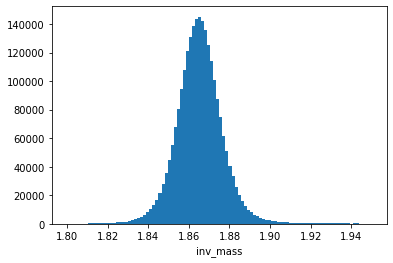

In [9]:
hinvmass = ROOT.TH1D("hinvmass", "hinvmass", 100, 1.5, 2.0)
fill_hist(hinvmass, dfreco["inv_mass"])
print("number of entries = ", hinvmass.GetEntries())
plt.hist(dfreco["inv_mass"], bins = 100, range = [1.8, 1.95])
plt.xlabel("inv_mass")

Text(0.5, 1.0, 'generated pT of D')

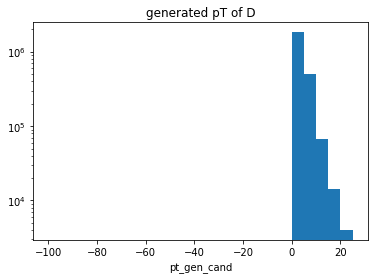

In [10]:
plt.hist(dfreco["pt_gen_cand"], bins = 25, range = [-100, 25])
plt.yscale('log')
plt.xlabel("pt_gen_cand")
plt.title("generated pT of D")

D0 candidates not matched to gen level are stored with pt_gen_cand = -99.

Text(0.5, 1.0, 'reconstructed pt of D')

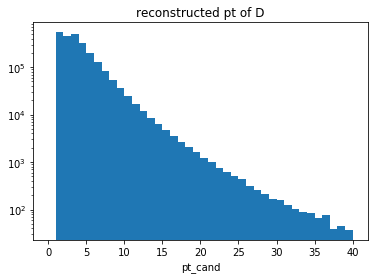

In [11]:
plt.hist(dfreco["pt_cand"], bins = Nbins_ptD, range = range_ptD)
plt.yscale('log')
plt.xlabel("pt_cand")
plt.title("reconstructed pt of D")

Define selection cuts.

In [12]:
is_matched = dfreco["pt_gen_cand"] > 0 # Unmatched D candidates have pt_gen_cand = -99.
cut_ptDMin = dfreco["pt_cand"] > 2
cut_ptJetMin = dfreco["pt_jet"] > 5
cut_etaJet = abs(dfreco["eta_jet"]) < 0.5 # |eta| < 0.9 - R

Apply cuts and get a data frame with only matched (associated) D0s.

In [13]:
dfreco_assoc = dfreco[is_matched & cut_ptDMin & cut_ptJetMin & cut_etaJet]

Text(0.5, 1.0, 'reconstructed pt of filtered D')

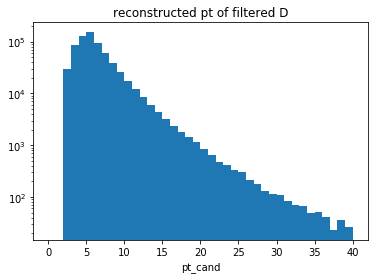

In [14]:
plt.hist(dfreco_assoc["pt_cand"], bins = Nbins_ptD, range = range_ptD)
plt.yscale('log')
plt.xlabel("pt_cand")
plt.title("reconstructed pt of filtered D")

In [15]:
dfreco_nonassoc = dfreco[dfreco["pt_gen_cand"] < 0]
if len(dfreco_nonassoc) > 0:
    plt.hist(dfreco_nonassoc["pt_cand"], bins = Nbins_ptD, range = range_ptD)
    plt.yscale('log')
    plt.xlabel("pt_cand")
    plt.title("reconstructed pt of unmatched D0s")
else:
    print("There are no unmatched D0s.")

There are no unmatched D0s.


Text(0.5, 1.0, 'Jet pt of filtered D jets')

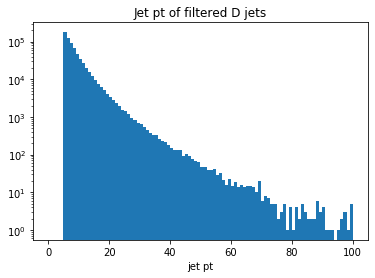

In [16]:
plt.hist(dfreco_assoc["pt_jet"], bins = Nbins_ptJet, range = range_ptJet)
plt.yscale('log')
plt.xlabel("jet pt")
plt.title("Jet pt of filtered D jets")

Text(0.5, 1.0, 'Response matrix for pt of D')

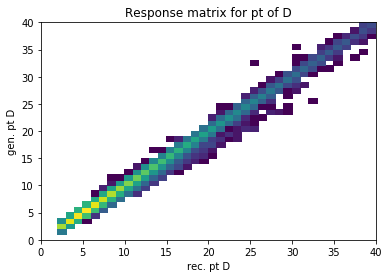

In [17]:
plt.hist2d(dfreco_assoc["pt_cand"], dfreco_assoc["pt_gen_cand"], norm = colors.LogNorm(), bins = [Nbins_ptD, Nbins_ptD], range = [range_ptD, range_ptD])
plt.xlabel("rec. pt D")
plt.ylabel("gen. pt D")
plt.title("Response matrix for pt of D")

Text(0.5, 1.0, 'Response matrix for jet pt')

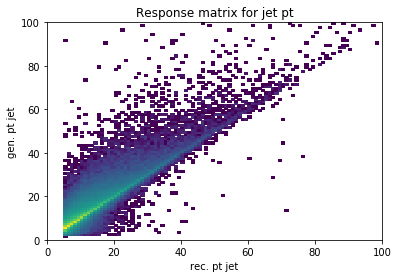

In [18]:
plt.hist2d(dfreco_assoc["pt_jet"], dfreco_assoc["pt_gen_jet"], norm = colors.LogNorm(), bins = [Nbins_ptJet, Nbins_ptJet], range = [range_ptJet, range_ptJet])
plt.xlabel("rec. pt jet")
plt.ylabel("gen. pt jet")
plt.title("Response matrix for jet pt")

In [19]:
hisRespJet = ROOT.TH2D("hisRespJet", \
                       "Response matrix for #it{p}_{T}^{jet, ch};#it{p}_{T}^{jet, ch, rec.};#it{p}_{T}^{jet, ch, gen.}", \
                       Nbins_ptJet, range_ptJet[0], range_ptJet[1], Nbins_ptJet, range_ptJet[0], range_ptJet[1])
# create an empty ROOT histogram for the response matrix
dfRespJet = dfreco_assoc.loc[:, ["pt_gen_jet", "pt_jet"]] # create a data frame with only selected columns
fill_hist(hisRespJet, dfRespJet) # fill the histogram with the data frame entries
hisRespJet.SetDirectory(0) # needed to avoid changing the histogram type to PyROOT_NoneType
fileRootOut = ROOT.TFile("histos.root", "recreate")
fileRootOut.cd()
hisRespJet.Write()
fileRootOut.Close()

/home/vkucera/.virtualenvs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/vkucera/.virtualenvs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0, 0.5, 'gen. z')

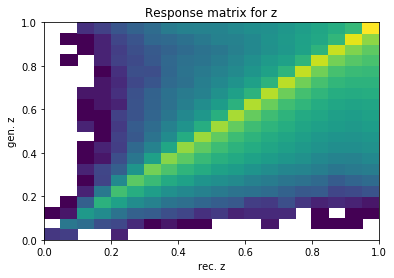

In [20]:
dfreco_assoc.loc[:, "zL"] = dfreco_assoc["pt_cand"] / dfreco_assoc["pt_jet"] # If you type just dfreco_assoc["zL"], it will raise SettingWithCopyWarning.
dfreco_assoc.loc[:, "zL_gen"] = dfreco_assoc["pt_gen_cand"] / dfreco_assoc["pt_gen_jet"]
dfRespZ = dfreco_assoc.loc[:, ["zL", "zL_gen"]]
plt.hist2d(dfRespZ["zL"], dfRespZ["zL_gen"], norm = colors.LogNorm(), bins = [Nbins_z, Nbins_z], range = [range_z, range_z])
plt.title("Response matrix for z")
plt.xlabel("rec. z")
plt.ylabel("gen. z")
#print(len(dfRespZ))

In [21]:
binsPtJetMin = [5, 10, 20, 40] # list of minimum jet pt values
listRespZ = [dfRespZ[dfreco_assoc["pt_jet"] > jetpt] for jetpt in binsPtJetMin] # get a list of data frames for jet pt higher than a given threshold from the list
fileRootOut = ROOT.TFile("histos.root", "update")
for i in range(len(binsPtJetMin)):
    hisRespZ = ROOT.TH2D("hisRespZ_ptjet{}".format(binsPtJetMin[i]), \
                         "Response matrix for #it{{z}}^{{ch}}, #it{{p}}_{{T}}^{{jet, ch, rec.}} > {} GeV/#it{{c}};#it{{z}}^{{ch, rec.}};#it{{z}}^{{ch, gen.}}".format(binsPtJetMin[i]), \
                         Nbins_z, range_z[0], range_z[1], Nbins_z, range_z[0], range_z[1])
    fill_hist(hisRespZ, listRespZ[i])
    hisRespZ.SetDirectory(0)
    fileRootOut.cd()
    hisRespZ.Write()
fileRootOut.Close()

In [22]:
binsZMin = [0, 0.2, 0.4, 0.6, 0.8] # list of minimum z values
listRespJet = [dfRespJet[dfreco_assoc["zL"] > zMin] for zMin in binsZMin] # get a list of data frames for z higher than a given threshold from the list
fileRootOut = ROOT.TFile("histos.root", "update")
for i in range(len(binsZMin)):
    hisRespJet = ROOT.TH2D("hisRespJet_zmin{}".format(binsZMin[i]), \
                         "Response matrix for #it{{p}}_{{T}}^{{jet, ch}}, #it{{z}}^{{ch, rec.}} > {};#it{{p}}_{{T}}^{{jet, ch, rec.}} (GeV/#it{{c}});#it{{p}}_{{T}}^{{jet, ch, gen.}} (GeV/#it{{c}})".format(binsZMin[i]), \
                         Nbins_ptJet, range_ptJet[0], range_ptJet[1], Nbins_ptJet, range_ptJet[0], range_ptJet[1])
    fill_hist(hisRespJet, listRespJet[i])
    hisRespJet.SetDirectory(0)
    fileRootOut.cd()
    hisRespJet.Write()
fileRootOut.Close()

In [23]:
dfPtDPtJet = dfreco_assoc.loc[:, ["pt_gen_cand", "pt_gen_jet"]]
hisPtDPtJet = ROOT.TH2D("hisPtDPtJet", \
                       "Dummy simulated ptD vs ptJet for the feed-down;#it{p}_{T}^{D, gen.};#it{p}_{T}^{jet, ch, gen.}", \
                       Nbins_ptD, range_ptD[0], range_ptD[1], Nbins_ptJet, range_ptJet[0], range_ptJet[1])
# create an empty ROOT histogram for the response matrix
fill_hist(hisPtDPtJet, dfPtDPtJet) # fill the histogram with the data frame entries
hisPtDPtJet.SetDirectory(0) # needed to avoid changing the histogram type to PyROOT_NoneType
fileRootOut = ROOT.TFile("histos.root", "update")
fileRootOut.cd()
hisPtDPtJet.Write()
fileRootOut.Close()